In [46]:
import numpy as np
import numpy.polynomial.polynomial as pol
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import sys

In [4]:
FontPath = '/System/Library/Fonts/ヒラギノ角ゴシック W4.ttc'

In [5]:
jpfont = FontProperties(fname=FontPath)

# 利率 r で資金を運用した時の現時点での W(0) 円が t年後にいくらになるのか

In [19]:
# 単利と複利の比較

r = 0.2        # 利率 20%
maturity = 10  # 運用期間 10年

In [20]:
simple_rate = 1.0 + r * np.linspace(0, maturity, maturity + 1)
simple_rate

array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ])

In [28]:
compound_1year = np.cumprod(np.tile(1.0 + r, maturity))
compound_1year = np.insert(compound_1year, 0, 1.0)
compound_1year

array([1.        , 1.2       , 1.44      , 1.728     , 2.0736    ,
       2.48832   , 2.985984  , 3.5831808 , 4.29981696, 5.15978035,
       6.19173642])

In [29]:
compound_6month = np.cumprod(np.tile((1.0 + r/2.0)**2, maturity))
compound_6month = np.insert(compound_6month, 0, 1.0)
compound_6month

array([1.        , 1.21      , 1.4641    , 1.771561  , 2.14358881,
       2.59374246, 3.13842838, 3.79749834, 4.59497299, 5.55991731,
       6.72749995])

In [26]:
contnuous_rate = np.exp(r*np.linspace(0, maturity, maturity + 1))
contnuous_rate

array([1.        , 1.22140276, 1.4918247 , 1.8221188 , 2.22554093,
       2.71828183, 3.32011692, 4.05519997, 4.95303242, 6.04964746,
       7.3890561 ])

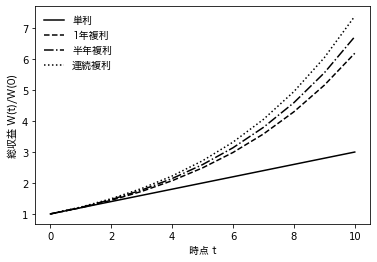

In [35]:
fig1 = plt.figure(1, facecolor='w')
plt.plot(simple_rate, 'k-')
plt.plot(compound_1year, 'k--')
plt.plot(compound_6month, 'k-.')
plt.plot(contnuous_rate, 'k:')
plt.legend(['単利', '1年複利', '半年複利', '連続複利'], loc='upper left', frameon=False, prop=jpfont)
plt.xlabel('時点 t', fontproperties=jpfont)
plt.ylabel('総収益 W(t)/W(0)', fontproperties=jpfont)
plt.show()

# Net Present Value = NPV = 正味現在価値

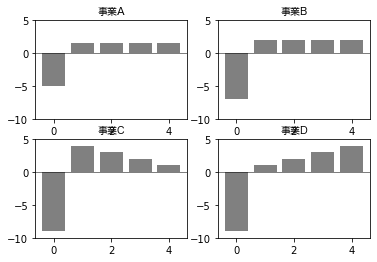

In [41]:
# キャッシュフローのグラフ
periods = np.linspace(0, 4, 5)
cf_list = np.array([
    [-5.0, 1.5, 1.5, 1.5, 1.5],
    [-7.0, 2.0, 2.0, 2.0, 2.0],
    [-9.0, 4.0, 3.0, 2.0, 1.0],
    [-9.0, 1.0, 2.0, 3.0, 4.0]
])
title = ['事業A', '事業B', '事業C', '事業D']

fig = plt.figure(1, facecolor='w')
for n in range(4):
    plt.subplot(2,2, n+1)
    plt.bar(periods, cf_list[n,:], color=(0.5, 0.5, 0.5))
    plt.title(title[n], fontproperties=jpfont)
    plt.axhline(color='k', linewidth=0.5)
    plt.ylim(-10, 5)
plt.show()

In [47]:
def npv(r, cf):
    # r: 割引率(%)
    # cf: キャッシュフロー配列
    # return: 正味現在価値
    x = 1.0 / (1.0 +  0.01 * r)
    return pol.polyval(x, cf)

In [51]:
# 各事業に対して、割引率 5% として、正味現在価値を計算
#
# 事業 C の例
#  PV(0) = - 9.0 
#          + 4.0 / (1+0.05) 
#          + 3.0 / (1+0.05)*2 
#          + 2.0 / (1+0.05)*3 
#          + 1.0 / (1+0.05)*4
#  = 投資の適正価値
#
npv_list = list(map(lambda cf: npv(5, cf), cf_list))

In [52]:
npv_list

[0.3189257562435399,
 0.09190100832472048,
 0.08098991675279166,
 -0.35123739594099135]

# Internal Rate of Return = IRR = 内部収益率

IRR は、投資手段と同等の双楸瑛きを生み出すような銀行預金の利率.  
投資の際には、候補となる事業のキャッシュフローの IRR を計算し、IRR が最も高い投資手段を選べば良い.  
また、投資判断に際しては IRR の最低水準をハードルレートとし、これを下回るものは投資しないという判断もできる.

In [69]:
def irr(cf):
    # cf: キャッシュフロー
    # return: 内部収益率(%)
    print("--------")
    roots = pol.polyroots(cf)
    print("###", roots)
    tmp = list(map(lambda root: np.isreal(root), roots))
    print(tmp)
    print("###", np.real(roots[np.isreal(roots)]))
    real = np.real(roots[np.isreal(roots)])
    positive = (real[real > 0.0]).item()
    return (1.0/positive - 1.0) * 100

In [70]:
irr_list = list(map(lambda cf: irr(cf), cf_list))

--------
### [-1.59220781+0.j        -0.16808896-1.4922355j -0.16808896+1.4922355j
  0.92838574+0.j       ]
[True, False, False, True]
### [-1.59220781  0.92838574]
--------
### [-1.60749706+0.j         -0.16989875-1.50651004j -0.16989875+1.50651004j
  0.94729457+0.j        ]
[True, False, False, True]
### [-1.60749706  0.94729457]
--------
### [-2.24857431+0.j         -0.34972032-2.02477497j -0.34972032+2.02477497j
  0.94801495+0.j        ]
[True, False, False, True]
### [-2.24857431  0.94801495]
--------
### [-1.37824496+0.j         -0.1685211 -1.28950323j -0.1685211 +1.28950323j
  0.96528715+0.j        ]
[True, False, False, True]
### [-1.37824496  0.96528715]


In [58]:
irr_list

[7.713847295208387, 5.56378463687659, 5.483568972354647, 3.5961162084678033]